In [46]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [47]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [48]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [49]:
tesla=yf.Ticker('TSLA')

In [50]:
tesla_data=tesla.history(period="max")

In [51]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [52]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text

In [53]:
soup = BeautifulSoup(html_data,"html.parser")

In [71]:
df=pd.read_html(html_data,header=0)
table=soup.find_all('table')
second_table= table[1]
tesla_revenue= pd.DataFrame(columns=["Date","Revenue"])
for row in second_table.find("tbody").find_all("tr"):
    col= row.find_all('td')
    date= col[0].text
    revenue= col[1].text
    tesla_revenue= tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index = True)
tesla_revenue["Revenue"]= tesla_revenue['Revenue'].str.replace('$','').str.replace(',','')
print(tesla_revenue)

          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [69]:
tesla_revenue.dropna(subset=['Revenue'], inplace=True)
for i in tesla_revenue : tesla_revenue[i] = tesla_revenue[i].astype(str)

In [70]:
tesla_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [57]:
gmestop=yf.Ticker("GME")

In [58]:
gme_data=gmestop.history(period="max")

In [59]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [40]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data=requests.get(url).text

In [41]:
soup = BeautifulSoup(html_data,"html.parser")

In [42]:
df=pd.read_html(html_data,header=0)
table=soup.find_all('table')
second_table= table[1]
gme_revenue= pd.DataFrame(columns=["Date","Revenue"])
for row in second_table.find("tbody").find_all("tr"):
    col= row.find_all('td')
    date= col[0].text
    revenue= col[1].text
    gme_revenue= gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index = True)
gme_revenue["Revenue"]= gme_revenue['Revenue'].str.replace('$','').str.replace(',','')
print(gme_revenue)
gme_revenue.dropna(subset=['Revenue'], inplace=True)
for i in gme_revenue : gme_revenue[i] = gme_revenue[i].astype(str)
print(gme_revenue)

          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]
          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [43]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


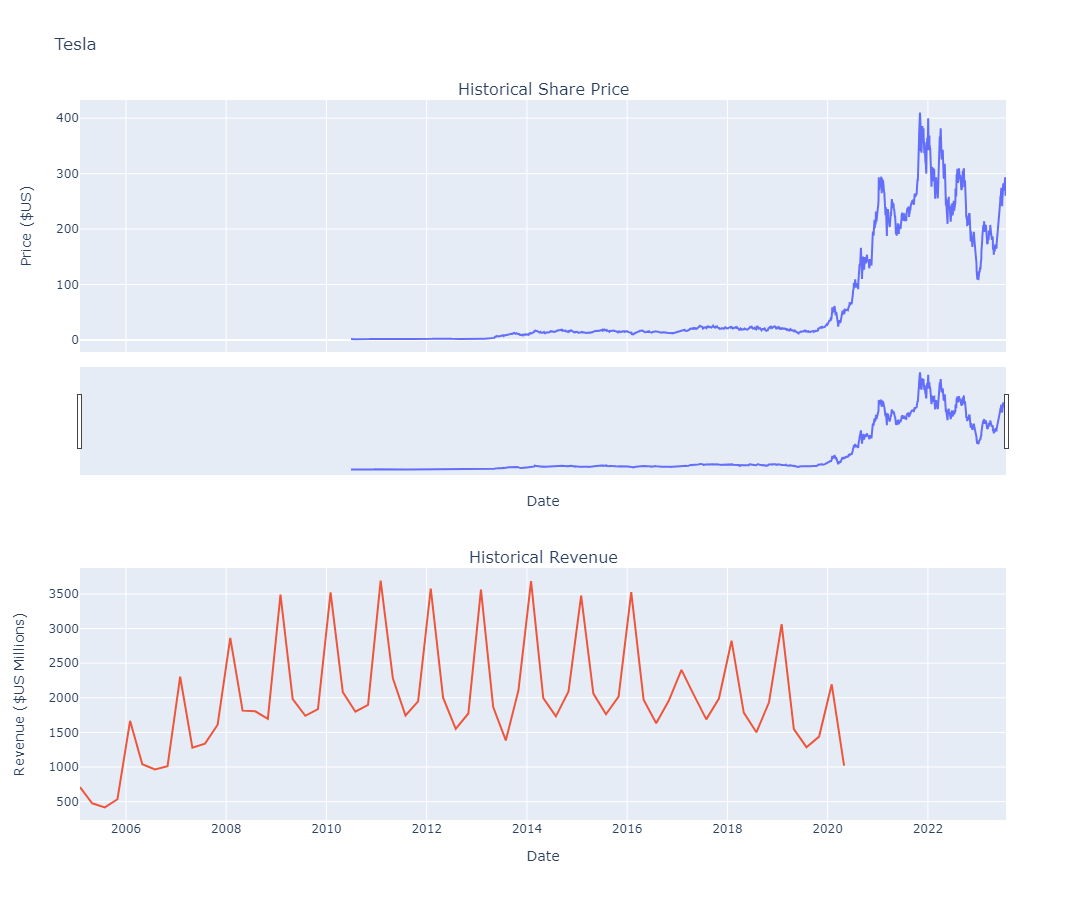

In [72]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

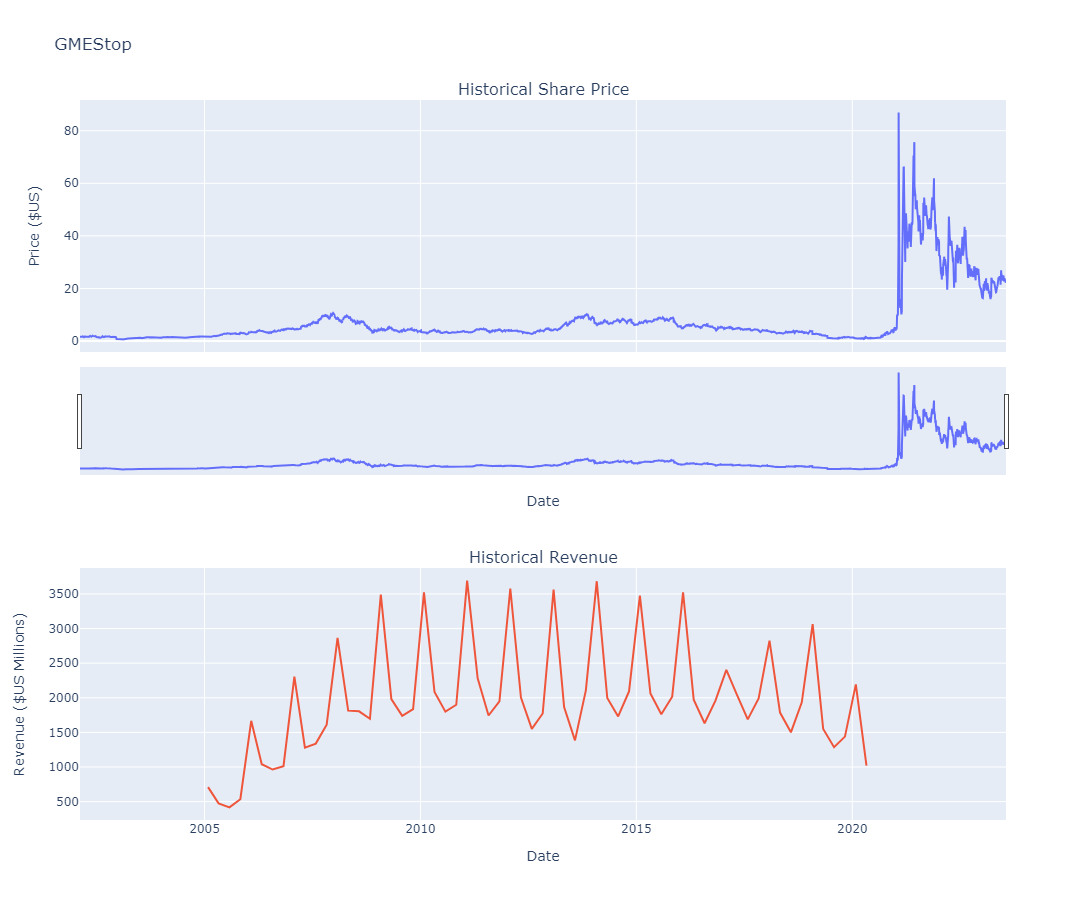

In [65]:
make_graph(gme_data, gme_revenue,'GMEStop')